In [32]:
import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec

### Configuration model

In [29]:
def CM(d):
    # Configuration model with degree sequence d = [d1, ... , dn] (a list or array)
    # di \ge 0 and sum to even 
    d = list(d)
    stubs_list = []
    for i in np.arange(len(d)):
        for j in np.arange(d[i]):
            stubs_list.append([i,j])
    
    G = nx.MultiGraph()
    while len(stubs_list)>0:
        ss= np.random.choice(np.asarray(len(stubs_list)), 2, replace=False)
        s1= ss[0]
        s2= ss[1]

        half_edge1 = stubs_list[s1]
        half_edge2 = stubs_list[s2]
        G.add_edge(half_edge1[0], half_edge2[0])
        stubs_list.remove(half_edge1)
        if s1 != s2:
            stubs_list.remove(half_edge2)
            
    return G

In [30]:
CM([3,2,1])

ValueError: too many values to unpack (expected 2)

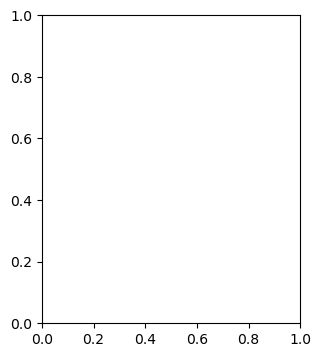

In [36]:
fig = plt.figure(figsize=[12,4], constrained_layout=False)
network_list = [""]
n_list=[10, 50, 100]
outer_grid = gridspec.GridSpec(nrows=1, ncols=len(n_list), wspace=0.3, hspace=0.1)

r = 3
clustering_list = [] 
path_length_list = []

for i in np.arange(len(n_list)): 
    deg_dist = [r]*n_list[i]
    G = CM(d=deg_dist)
    title = r"CM (${}$-regular, $n$={})".format(r, n_list[i])
    
    degrees = [G.degree(n) for n in G.nodes()]

    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.5 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')
    ax.legend()
    title = title + "\n avg. cl. coeff.={}".format(np.round(nx.average_clustering(G0),3))
    ax.set_title(title, fontsize=10)


plt.savefig("CM_0", bbox_inches="tight")